# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [601]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [602]:
data= pd.read_csv("Company_Data.csv")

In [603]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [604]:
data.isnull().any()#to check if we have null valuesin dataset or not
#so there are no null values in the dataset


Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [605]:
#converting object type data into numerical value
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 
data['US']= label_encoder.fit_transform(data['US']) 
data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [607]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [608]:
#Convertinng Sales data into categorical data
category = pd.cut(data.Sales,bins=[-1,5.39,9.32,17],labels=['low','moderate','high'])
data.insert(0,'Sales_Group',category)
 

In [609]:
data 

,Sales_Group,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,9.50,138,73,11,276,120,0,42,17,1,1
1,high,11.22,111,48,16,260,83,1,65,10,1,1
2,high,10.06,113,35,10,269,80,2,59,12,1,1
3,moderate,7.40,117,100,4,466,97,2,55,14,1,1
4,low,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,high,12.57,138,108,17,203,128,1,33,14,1,1
396,moderate,6.14,139,23,3,37,120,2,55,11,0,1
397,moderate,7.41,162,26,12,368,159,2,40,18,1,1
398,moderate,5.94,100,79,7,284,95,0,50,12,1,1


In [610]:
data.drop(['Sales'],axis = 1, inplace = True) 

In [611]:
data 

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,moderate,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,1,1
396,moderate,139,23,3,37,120,2,55,11,0,1
397,moderate,162,26,12,368,159,2,40,18,1,1
398,moderate,100,79,7,284,95,0,50,12,1,1


In [612]:
#assign values to Sales_Group column
label_encoder = preprocessing.LabelEncoder()
data['Sales_Group']= label_encoder.fit_transform(data['Sales_Group'])  

In [613]:
data 

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [614]:
x=data.iloc[:,1:11]
y=data['Sales_Group'] 

In [615]:
#independent variables
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [616]:
 #target variable
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales_Group, Length: 400, dtype: int64

In [617]:
data['Sales_Group'].unique()

array([0, 2, 1])

In [618]:
data.Sales_Group.value_counts()

2    201
1    100
0     99
Name: Sales_Group, dtype: int64

In [619]:
colnames = list(data.columns)
colnames

['Sales_Group',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [665]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0) 

# Building Decision Tree Classifier using Entropy Criteria
 

In [666]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

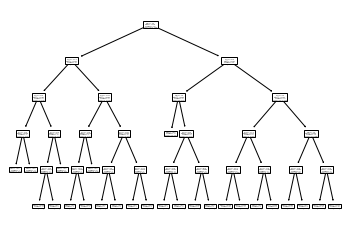

In [667]:
#PLot the decision tree
tree.plot_tree(model);


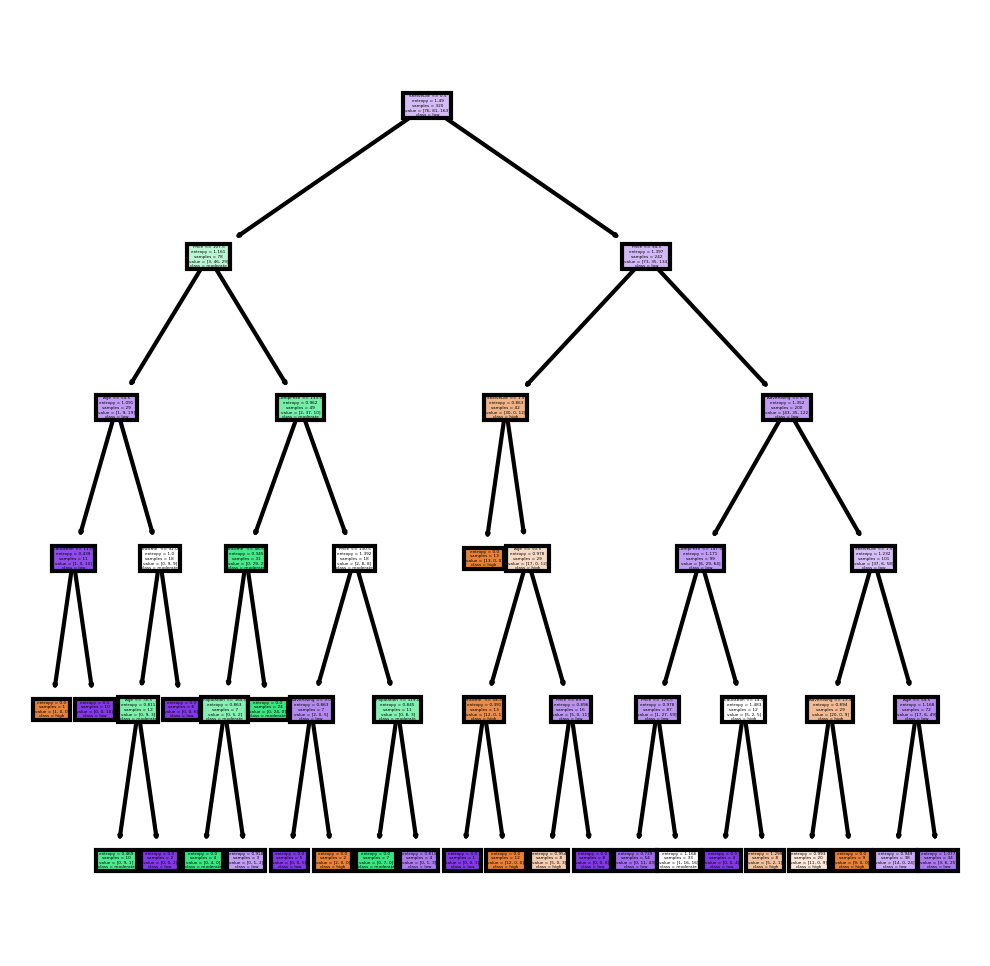

In [668]:
fn=['CompPrice','Income ','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['high', 'moderate', 'low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [669]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

2    41
0    23
1    16
dtype: int64

In [670]:
preds 

array([0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0])

In [671]:
y_test

132    0
309    0
341    2
196    1
246    2
      ..
14     0
363    0
304    0
361    2
329    0
Name: Sales_Group, Length: 80, dtype: int64

In [672]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Sales_Group,,,
0,14,0,9
1,1,9,9
2,8,7,23


In [673]:
 # Accuracy 
np.mean(preds==y_test)

0.575

# Accuracy of the model is 57.5%

# Building Decision Tree Classifier (CART) using Gini Criteria

In [674]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)


In [675]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [676]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.575

# Accuracy using Gini Criteria is 57.5%

# Decision Tree Regression Example

In [677]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [678]:
array = data.values
X = array[:,2:9]
y = array[:,1] 

In [679]:
X

array([[ 73,  11, 276, ...,   0,  42,  17],
       [ 48,  16, 260, ...,   1,  65,  10],
       [ 35,  10, 269, ...,   2,  59,  12],
       ...,
       [ 26,  12, 368, ...,   2,  40,  18],
       [ 79,   7, 284, ...,   0,  50,  12],
       [ 37,   0,  27, ...,   1,  49,  16]])

In [680]:
# price charged by competitor is considered y variable for regression model
y

array([138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117, 122,
       115, 107, 149, 118, 147, 110, 129, 125, 134, 128, 121, 145, 139,
       107,  98, 103, 104, 125, 136, 107, 114, 115, 131, 122, 121, 109,
       130, 119, 157,  77, 123,  85, 141, 127, 126, 116, 157,  99, 121,
       153, 109, 134, 143, 133,  93, 103, 118, 122, 105, 139, 119, 100,
       122, 127, 126, 149, 127,  89, 148, 115, 118, 150,  88, 102, 118,
       134, 134, 113, 116, 151, 109, 111, 125, 150, 131, 117, 128, 115,
        97, 114, 145, 115, 134, 147, 161, 122, 121, 113, 128, 113, 123,
       121, 104, 102, 134, 107, 115, 128, 132, 116, 131, 122, 139, 135,
       145, 112, 130, 128, 125, 119, 127, 131,  89, 153, 125, 133, 143,
        94, 108, 125, 132, 132,  96, 131, 128, 125, 146, 133, 140, 124,
       122, 132, 144, 114, 140, 110, 121, 122, 111, 128, 150, 129,  98,
       146, 121, 142, 119, 111, 143, 122, 130, 148, 147, 119, 106, 129,
       104, 128,  93, 104, 135, 139, 115, 138, 138, 104, 144, 13

In [687]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,random_state=40) 

In [688]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [689]:
#Find the accuracy
model.score(X_test,y_test)

0.579123018448132

# For Regression model accuracy is approx 60%